In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Boston_Social_Vulnerability.csv')
df.head(5)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.000000,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.382812,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.910156,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.007812,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.238281,3143.610637


In [5]:
df_311 = pd.read_csv('311_all_case.csv', low_memory=False)
df_311.head(5)


,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,propid
0,179937.0,Electrical,101000102011,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Building,Constituent Call,Inspectional Services,303291000.0,...,0,0,0,0,0,0,0,0,0,NaN
1,180062.0,Electrical,101000101931,NaN,"4 Union Park St, Roxbury, MA 02118",2010-01-01,Building,Constituent Call,Inspectional Services,305963000.0,...,0,0,0,0,0,0,0,0,0,NaN
2,222060.0,Fire in Food Establishment,101000102010,NaN,"227 Hanover St, Boston, MA 02113",2010-01-01,Health,Constituent Call,Inspectional Services,303291000.0,...,0,0,0,0,0,0,0,0,0,NaN
3,244491.0,General Comments For a Program or Policy,101000101966,2010-01-02,NaN,2010-01-01,Employee & General Comments,Constituent Call,Mayor's 24 Hour Hotline,NaN,...,0,0,0,0,0,0,0,0,0,NaN
4,259240.0,General Lighting Request,101000102004,2010-03-10,"INTERSECTION of Mount Vernon St & Walnut St, B...",2010-01-01,Street Lights,Constituent Call,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,NaN


In [7]:
df_311.fillna(0)
df_311.columns

Index(['Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID', 'CLOSED_DT', 'LOCATION',
       'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT', 'LocationID', 'X', 'Y',
       'TLID', 'BLK_ID_10', 'BG_ID_10', 'CT_ID_10', 'NSA_NAME', 'BRA_PD',
       'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI',
       'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM', 'propid'],
      dtype='object')

In [9]:
df_311_ct = df_311.groupby(['CT_ID_10']).count()
df_311_ct.head(5)

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,propid
CT_ID_10,,,,,,,,,,,,,,,,,,,,,
2.501737e+10,0,69,69,54,69,69,69,69,69,0,...,69,69,69,69,69,69,69,69,69,69
2.502140e+10,0,81,81,63,81,81,81,81,81,0,...,81,81,81,81,81,81,81,81,81,81
2.502140e+10,0,98,98,83,98,98,98,98,98,0,...,98,98,98,98,98,98,98,98,98,98
2.502140e+10,0,5,5,4,5,5,5,5,5,0,...,5,5,5,5,5,5,5,5,5,5
2.502140e+10,0,9,9,8,9,9,9,9,9,0,...,9,9,9,9,9,9,9,9,9,9


In [10]:
Total_cases = df_311_ct['CASE_ENQUIRY_ID'].sum()
Total_cases

2520680

In [12]:
df.columns

Index(['FID', 'GEOID10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2',
       'MedIllnes', 'Name', 'Shape__Area', 'Shape__Length'],
      dtype='object')

In [13]:
df['OlderAdult ratio']=(df['OlderAdult'])/(df['POP100_RE']+1)
df['Child ratio']=(df['TotChild'])/(df['POP100_RE']+1)
df['Disablity ratio']=(df['TotDis'])/(df['POP100_RE']+1)
df['Low to No Income ratio']=(df['Low_to_No'])/(df['POP100_RE']+1)
df['Limited Eng Proficiency ratio']=(df['LEP'])/(df['POP100_RE']+1)
df['People of Color ratio']=(df['POC2'])/(df['POP100_RE']+1)
df['Mental Illness ratio']=(df['MedIllnes'])/(df['POP100_RE']+1)

In [17]:
df.index = df['GEOID10']
df.head(5)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,...,Name,Shape__Area,Shape__Length,OlderAdult ratio,Child ratio,Disablity ratio,Low to No Income ratio,Limited Eng Proficiency ratio,People of Color ratio,Mental Illness ratio
GEOID10,,,,,,,,,,,,,,,,,,,,,
25025010405,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,...,Mission Hill,666100.000000,6036.192907,0.059931,0.010864,0.085099,0.215644,0.275575,0.317762,0.385881
25025010404,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,...,Fenway,250612.382812,2176.592171,0.009625,0.013235,0.051392,0.410278,0.419904,0.300619,0.378333
25025010801,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,...,Back Bay,234357.910156,2542.043078,0.140086,0.100934,0.030172,0.025862,0.165948,0.160560,0.436336
25025010702,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,...,Back Bay,549614.007812,3224.573044,0.118701,0.035818,0.018742,0.077884,0.196585,0.133278,0.422407
25025010204,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,...,Fenway,466585.238281,3143.610637,0.011342,0.004096,0.041273,0.281979,0.293321,0.327347,0.372331


In [19]:
merged_df = pd.merge(df, df_311_ct, left_index=True, right_index=True)
merged_df.columns

Index(['FID', 'GEOID10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2',
       'MedIllnes', 'Name', 'Shape__Area', 'Shape__Length', 'OlderAdult ratio',
       'Child ratio', 'Disablity ratio', 'Low to No Income ratio',
       'Limited Eng Proficiency ratio', 'People of Color ratio',
       'Mental Illness ratio', 'Unnamed: 0', 'TYPE', 'CASE_ENQUIRY_ID',
       'CLOSED_DT', 'LOCATION', 'OPEN_DT', 'REASON', 'SOURCE', 'SUBJECT',
       'LocationID', 'X', 'Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'NSA_NAME',
       'BRA_PD', 'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD',
       'GRAFFITI', 'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM',
       'propid'],
      dtype='object')

In [21]:
cols = ['OlderAdult ratio', 'Child ratio', 'Disablity ratio', 'People of Color ratio', 'Limited Eng Proficiency ratio', 'Mental Illness ratio', 'Low to No Income ratio']

for col in cols:
    print(f"Correlation between 311 cases and {col}: ", merged_df['CASE_ENQUIRY_ID'].corr(merged_df[col]))

Correlation between 311 cases and OlderAdult ratio:  0.14659642799623482
Correlation between 311 cases and Child ratio:  0.06794433787004699
Correlation between 311 cases and Disablity ratio:  -0.04624677509954439
Correlation between 311 cases and People of Color ratio:  -0.11798641920655291
Correlation between 311 cases and Limited Eng Proficiency ratio:  -0.09023608847491736
Correlation between 311 cases and Mental Illness ratio:  0.2921872524574112
Correlation between 311 cases and Low to No Income ratio:  -0.1494264350800502


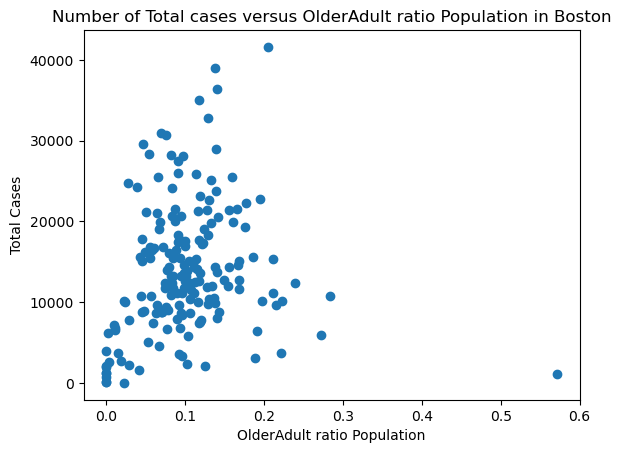

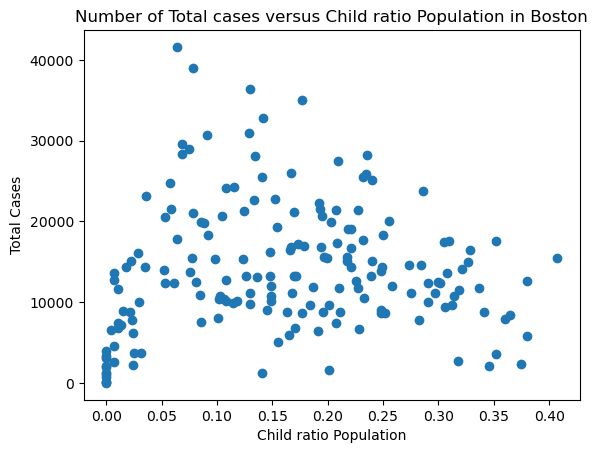

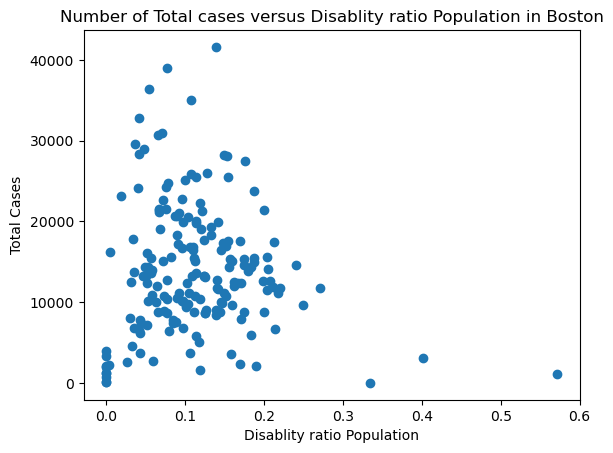

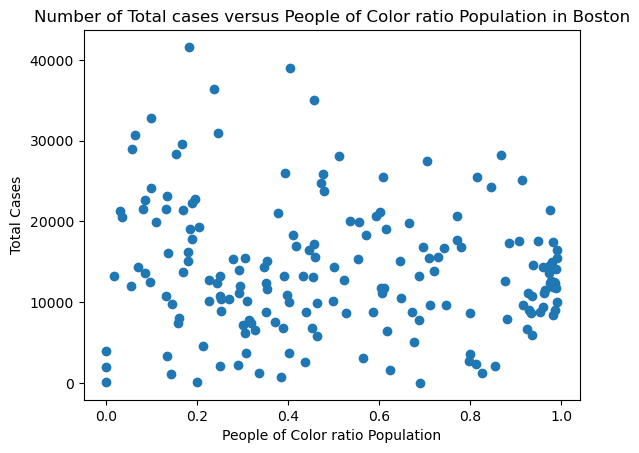

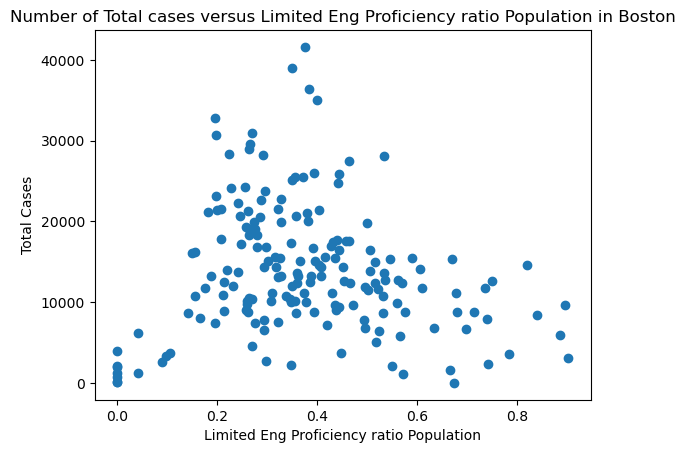

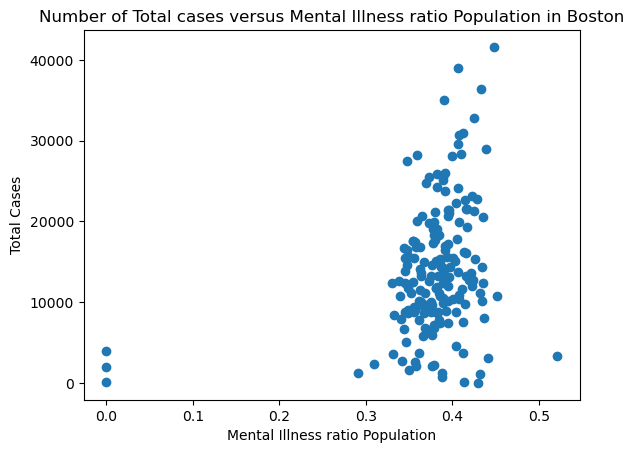

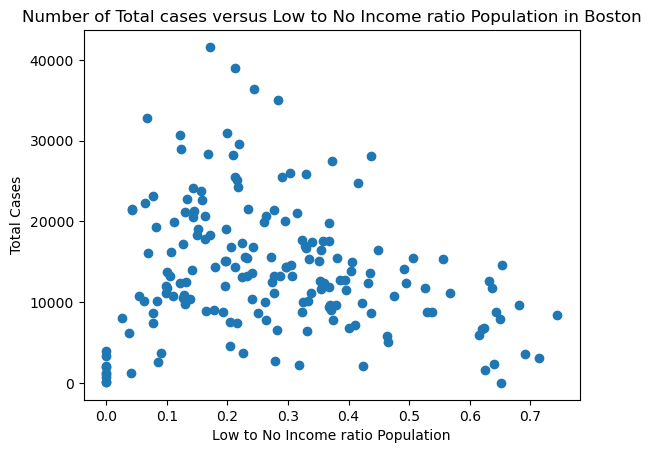

In [24]:
import matplotlib.pyplot as plt

demographics = ['OlderAdult ratio', 'Child ratio', 'Disablity ratio', 'People of Color ratio', 'Limited Eng Proficiency ratio', 'Mental Illness ratio', 'Low to No Income ratio']


for demo in demographics:
    plt.scatter(merged_df[demo], merged_df['CASE_ENQUIRY_ID'])
    plt.xlabel(demo + ' Population')
    plt.ylabel('Total Cases')
    plt.title('Number of Total cases versus ' + demo + ' Population in Boston')
    plt.show()